# Framework Tutorial

In [1]:
# Importing numpy aand torch
import numpy as np

import torch
import torch.nn as nn

## Import Data

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255.0
X_test /= 255.0
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)
nb_classes = 10
y_train = np.eye(nb_classes)[y_train]
y_test = np.eye(nb_classes)[y_test]

2025-01-27 00:24:33.735975: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 00:24:33.745322: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737933873.755265  201125 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737933873.758312  201125 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 00:24:33.771166: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## Define the program parameters

In [3]:
# Define training parameters
tol = 1e-4
batch_size = 1000
learning_rate = 1e-4
epochs = 80
# epochs = 2

# Define the model
input_size = 784 #784
hidden_size = 80 #800
output_size = 10 #10

## Define an activation function and its derivative

In [4]:
act_function = nn.Tanh()
def act_function_derivative(x):
    return 1 - torch.tanh(x) ** 2


## Import and create a Model

In [5]:
from framework import DynamicModel


model_DFA = DynamicModel([input_size, hidden_size, hidden_size, output_size], act_function, act_function_derivative) 

model_DFA.summary(input_shape=(1,input_size))

===========================MODEL SUMMARY==============================
Layer     Input Shape         Output Shape        Activation          
0         [1, 784]            [1, 80]             <class 'torch.nn.modules.activation.Tanh'>
1         [1, 80]             [1, 80]             <class 'torch.nn.modules.activation.Tanh'>
2         [1, 80]             [1, 10]             <class 'builtin_function_or_method'>
input size  : 784
output size : 10
layers sizes: [784, 80, 80, 10]
============================END SUMMARY===============================


## Import a train loop from the framework and train the network

In [6]:
from framework import MNIST_train_class_averaged as train 

te_dfa, loss_dfa = train(model_DFA, X_train, y_train, n_epochs=epochs, lr=learning_rate, batch_size=batch_size, tol = -1)

Epoch 1: Loss = 0.6085, Training Error = 0.0100
Epoch 2: Loss = 0.4403, Training Error = 0.0100
Epoch 3: Loss = 0.3679, Training Error = 0.0100
Epoch 4: Loss = 0.3434, Training Error = 0.0100
Epoch 5: Loss = 0.3342, Training Error = 0.0100
Epoch 6: Loss = 0.3302, Training Error = 0.0100
Epoch 7: Loss = 0.3279, Training Error = 0.0100
Epoch 8: Loss = 0.3261, Training Error = 0.0100
Epoch 9: Loss = 0.3242, Training Error = 0.0100
Epoch 10: Loss = 0.3219, Training Error = 0.0100
Epoch 11: Loss = 0.3191, Training Error = 0.0100
Epoch 12: Loss = 0.3159, Training Error = 0.0100
Epoch 13: Loss = 0.3123, Training Error = 0.0100
Epoch 14: Loss = 0.3085, Training Error = 0.0100
Epoch 15: Loss = 0.3045, Training Error = 0.0100
Epoch 16: Loss = 0.3000, Training Error = 0.0100
Epoch 17: Loss = 0.2955, Training Error = 0.0099
Epoch 18: Loss = 0.2908, Training Error = 0.0099
Epoch 19: Loss = 0.2859, Training Error = 0.0099
Epoch 20: Loss = 0.2809, Training Error = 0.0099
Epoch 21: Loss = 0.2758, Trai

## Plotting the loss and training error

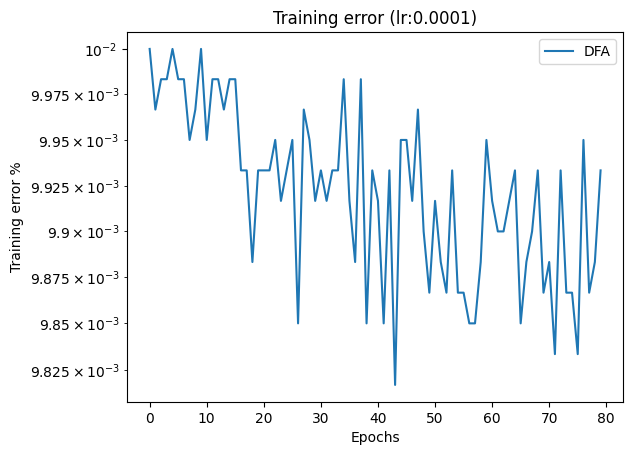

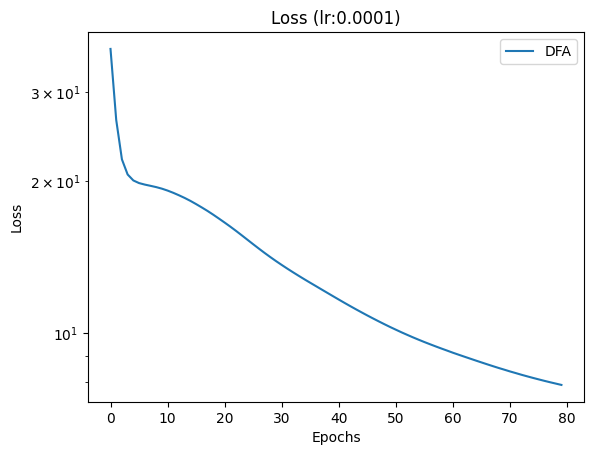

In [7]:
import matplotlib.pyplot as plt

# Training error
plt.plot(range(len(te_dfa)), te_dfa, label='DFA')
plt.title(f'Training error (lr:{learning_rate})')
plt.xlabel('Epochs')
plt.ylabel('Training error %')
plt.yscale('log')
plt.legend(loc='best')
plt.show()



# Loss
plt.plot(range(len(loss_dfa)), loss_dfa, label='DFA')
plt.title(f'Loss (lr:{learning_rate})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

## Testing the resulting model

In [8]:
nb_dat = len(X_test)
found = 0
for index in range(nb_dat):
    X = torch.tensor(X_test[index], dtype=torch.float32)
    pred = model_DFA(X)

    predicted_val = np.argmax(pred.detach().numpy())
    expected_val = np.argmax(y_test[index])
    if expected_val == predicted_val:
        found += 1

print(f'\n\nNb dat : {nb_dat}\t found : {found}\t Accuracy : {found/nb_dat}')




Nb dat : 10000	 found : 8150	 Accuracy : 0.815


## Confusion matrix 

Confusion Matrix for DFA model
[[ 916    0   11    3    0   16   24    1    9    0]
 [   0 1056   43    2    0    1    4    0   29    0]
 [  25   28  812   53   24    0   31   18   40    1]
 [   8   10   34  835    1   30    9   22   55    6]
 [   0   24   15    0  822    0   34    2    8   77]
 [  50   20   47   85   23  566   38   10   44    9]
 [  33   15   42    0   18   23  826    0    1    0]
 [  17   38   29    0    9    0    3  876   21   35]
 [  13   29   34   73   12   32   19   17  729   16]
 [  26   28   14   11  106    5    5   77   25  712]]


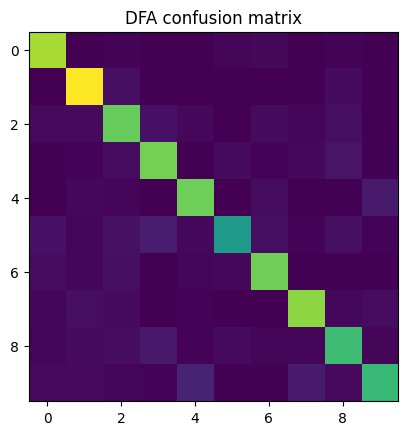

In [9]:
def compute_confusion_matrix_and_accuracy(model, X_test, y_test):
    num_classes = 10  # Number of classes in your dataset
    conf_mat = np.zeros((num_classes, num_classes), dtype=int)
    correct_predictions = 0
    with torch.no_grad():
        for index in range(len(X_test)):
            X = torch.tensor(X_test[index], dtype=torch.float32).unsqueeze(0)  # Add batch dimension if needed
            pred = model(X)
            predicted_val = np.argmax(pred.detach().numpy())
            expected_val = np.argmax(y_test[index])
            conf_mat[expected_val, predicted_val] += 1
            if predicted_val == expected_val:
                correct_predictions += 1
    accuracy = correct_predictions / len(X_test)
    return conf_mat, accuracy

conf_mat_DFA, accuracy_DFA = compute_confusion_matrix_and_accuracy(model_DFA, X_test, y_test)
print("Confusion Matrix for DFA model")

print(conf_mat_DFA)

if True:
    import matplotlib.pyplot as plt
    plt.imshow(conf_mat_DFA)
    plt.title("DFA confusion matrix")
    plt.show()



### Recalls and precision

(0.0, 1.0)

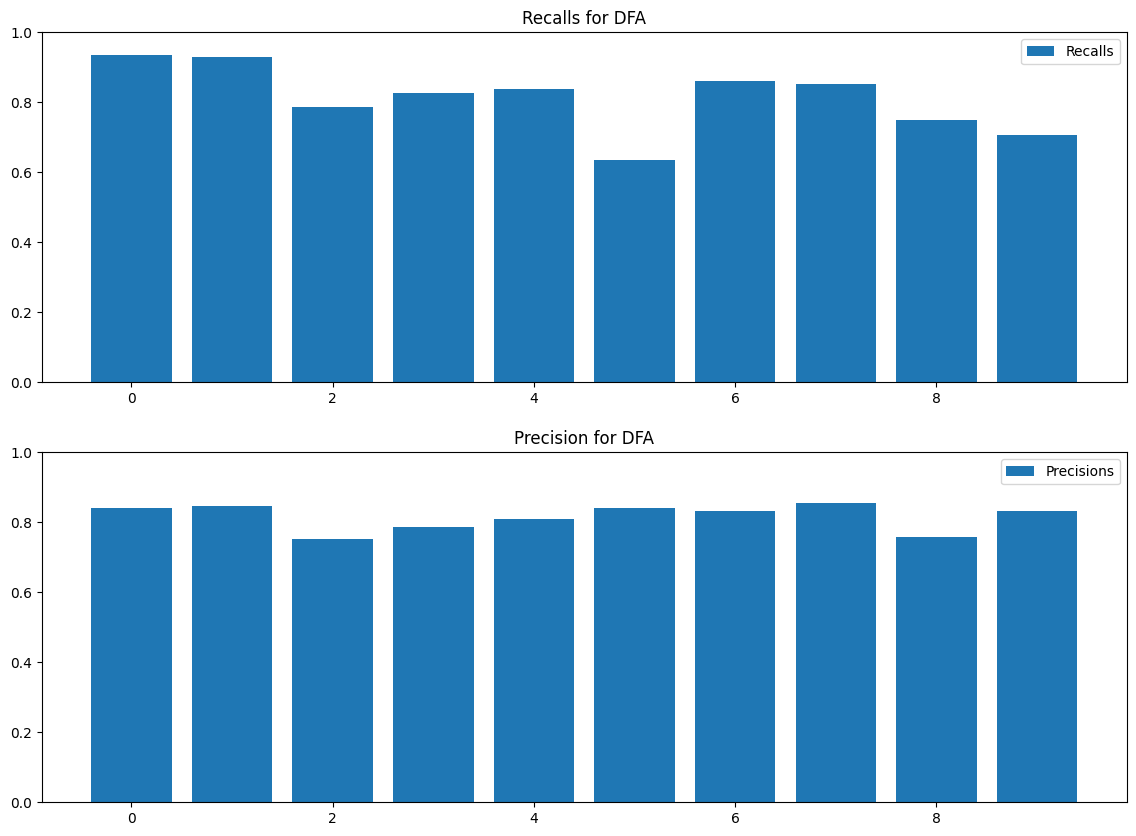

In [10]:
def compute_recall_and_precision(conf_matrix):
    num_classes = conf_matrix.shape[0]
    recalls = []
    precisions = []
    for i in range(num_classes):
        true_positives = conf_matrix[i, i]
        false_negatives = np.sum(conf_matrix[i, :]) - true_positives
        false_positives = np.sum(conf_matrix[:, i]) - true_positives
        if true_positives + false_negatives == 0:
            recall = np.nan  # Avoid division by zero if no actual positives in class
        else:
            recall = true_positives / (true_positives + false_negatives)
        if true_positives + false_positives == 0:
            precision = np.nan  # Avoid division by zero if no predicted positives in class
        else:
            precision = true_positives / (true_positives + false_positives)
        recalls.append(recall)
        precisions.append(precision)
    return recalls, precisions


recalls_dfa, precisions_dfa = compute_recall_and_precision(conf_mat_DFA)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))


# Plot 1: Recalls and Precision for Backpropagation
axes[0].bar(range(len(recalls_dfa)), recalls_dfa, label="Recalls")
axes[0].set_title("Recalls for DFA")
axes[0].legend()
axes[0].set_ylim(0, 1)

# Plot 2: Recalls and Precision for DFA
axes[1].bar(range(len(precisions_dfa)), precisions_dfa, label="Precisions")
axes[1].set_title("Precision for DFA")
axes[1].legend()
axes[1].set_ylim(0, 1)

